<a href="https://colab.research.google.com/github/Sakshi0700/Heart_Disease/blob/main/heart_disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np 
from sklearn.preprocessing import MinMaxScaler,StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.linear_model import LogisticRegression as LR
from sklearn.ensemble import RandomForestClassifier as RFC 
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_recall_curve
from yellowbrick.classifier import ROCAUC
import seaborn as sns



In [ ]:
df1=pd.read_csv("https://raw.githubusercontent.com/saichandank/aml/main/heart.csv")

In [ ]:
#checking null values
df1.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
#checking correlation between attributes
df1.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


In [ ]:
#converting int to float
column=df1.columns
for i in column[:-1]:
  df1[i]=df1[i].astype(float)

<Axes: >

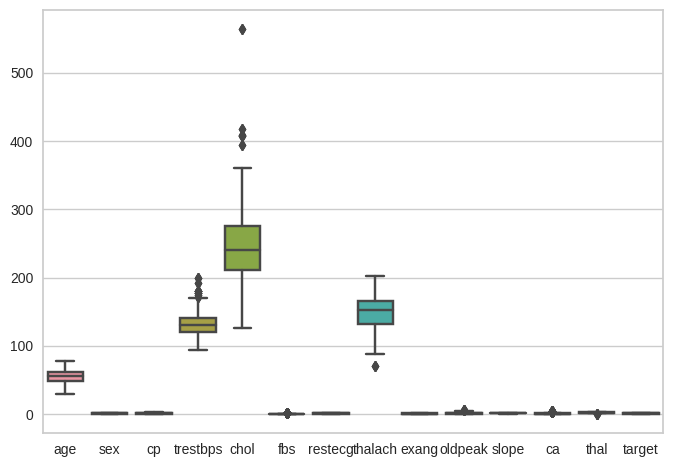

In [ ]:
sns.boxplot(data=df1)

In [ ]:
scalar=StandardScaler()
scalar.fit(df1[column[:-1]])
df=scalar.transform(df1[column[:-1]])

<Axes: >

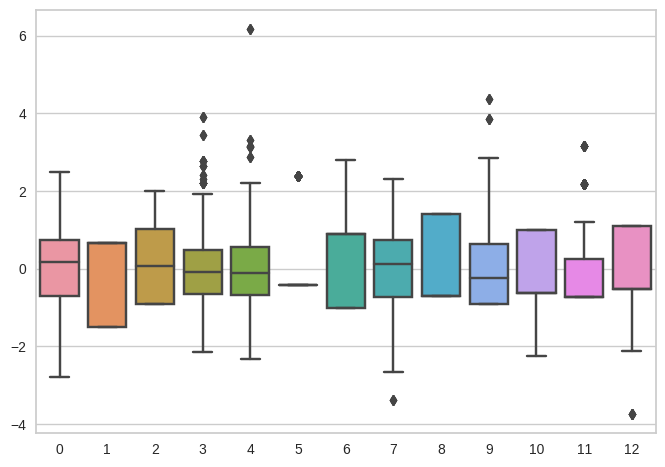

In [ ]:
sns.boxplot(df)

In [ ]:
train_data,test_data=train_test_split(df1,test_size=0.2,random_state=55)

In [ ]:
x=df
y=df1['target']

print(x.shape,y.shape)

(1025, 13) (1025,)


In [ ]:
train,test=train_test_split(df1,test_size=0.2,random_state=55)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=55)
print(x_train.shape,y_train.shape,train.shape)
y_train=y_train.astype('int')


(820, 13) (820,) (820, 14)


In [ ]:
#Naive bayes
nb=GaussianNB()
nb.fit(x_train,y_train)
y_pred=nb.predict(x_test)

In [ ]:
cm=confusion_matrix(y_test,y_pred)


In [ ]:
def metrics(cm):
    tp = cm[0][0] 
    fp = cm[0][1]
    fn = cm[1][0] 
    tn = cm[1][1] 

    precision = tp/(tp + fp)
    recall = tp/(tp+fn)
    f1_score = 2*(precision* recall)/(precision+recall)

    return precision,recall,f1_score
  
precision,recall,f1_score=metrics(cm)

print(f'confusion matrix\n{cm},\nnaive bayes:\naccuracy={accuracy_score(y_test,y_pred)*100} \nprecision={precision*100} \nrecall={recall*100} \nf1_score={f1_score*100}')

confusion matrix
[[71 27]
 [11 96]],
naive bayes:
accuracy=81.46341463414633 
precision=72.44897959183673 
recall=86.58536585365853 
f1_score=78.8888888888889


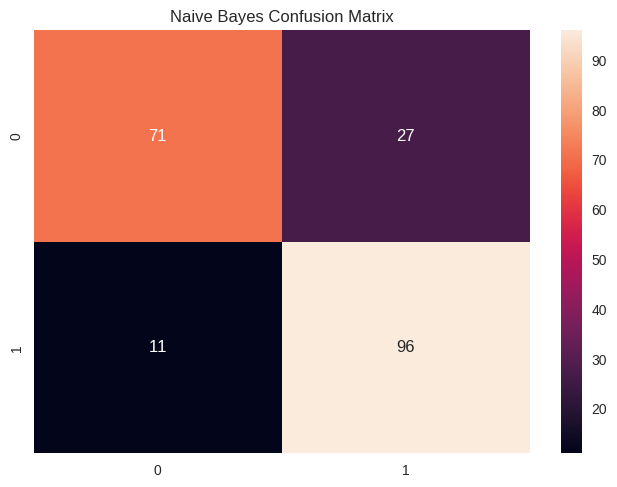

In [ ]:
sns.heatmap(pd.DataFrame(cm),annot=True)
plt.title("Naive Bayes Confusion Matrix")
plt.show()

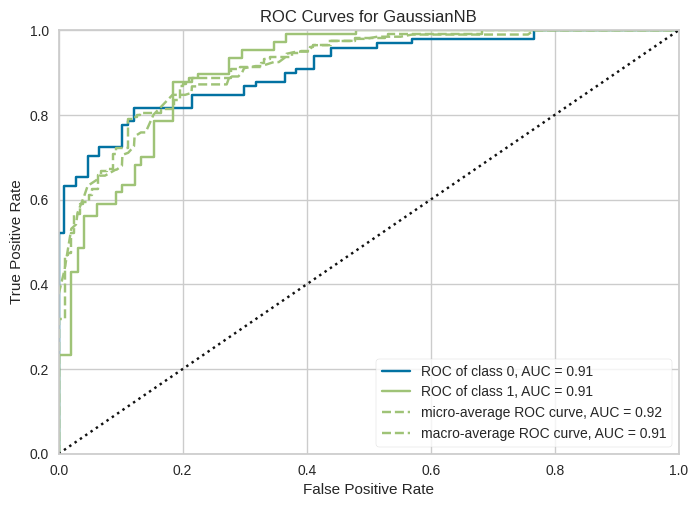

<Axes: title={'center': 'ROC Curves for GaussianNB'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [ ]:
roc=ROCAUC(nb)
roc.fit(x_train,y_train)
roc.score(x_test,y_test)
roc.show()

In [ ]:
#Logistic Regression

In [ ]:
model_logistic = LR()
model_logistic.fit(x_train, y_train)
y_pred_logistic = model_logistic.predict(x_test)

In [ ]:
cm=confusion_matrix(y_test,y_pred_logistic)

In [ ]:
precision,recall,f1_score=metrics(cm)

print(f'confusion matrix\n{cm},\n Logistic Regression:\naccuracy={accuracy_score(y_test,y_pred_logistic)*100:.3f} \nprecision={precision*100:.3f} \nrecall={recall*100:.3f} \nf1_score={f1_score*100:.3f}')

confusion matrix
[[ 71  27]
 [  5 102]],
 Logistic Regression:
accuracy=84.390 
precision=72.449 
recall=93.421 
f1_score=81.609


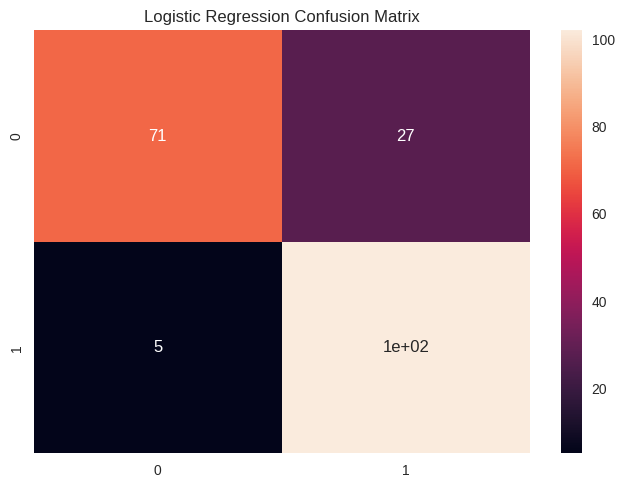

In [ ]:
sns.heatmap(pd.DataFrame(cm),annot=True)

plt.title("Logistic Regression Confusion Matrix")
plt.show()

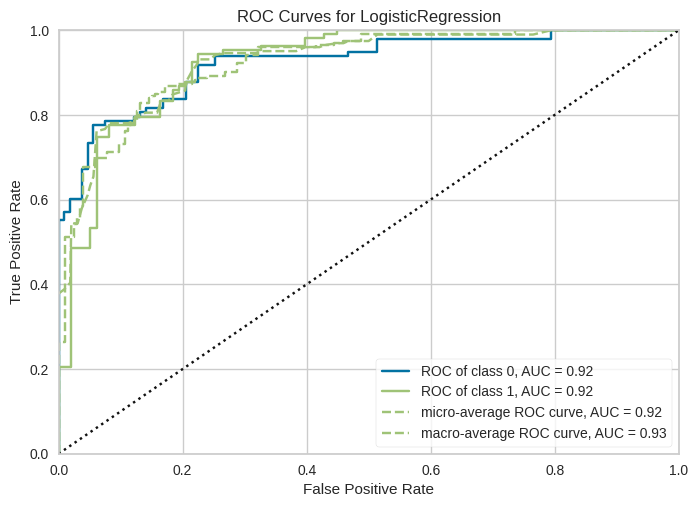

<Axes: title={'center': 'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [ ]:
roc=ROCAUC(model_logistic)
roc.fit(x_train,y_train)
roc.score(x_test,y_test)
roc.show()

In [ ]:
#Support Vector Machine

In [ ]:
svm = SVC(kernel = 'rbf', random_state = 4, probability=True)
svm.fit(x_train, y_train)
y_pred_svm = svm.predict(x_test)

In [ ]:
cm=confusion_matrix(y_test,y_pred_svm)

In [ ]:
precision,recall,f1_score=metrics(cm)

print(f'confusion matrix\n{cm},\nSVM:\naccuracy={accuracy_score(y_test,y_pred_svm)*100:.3f} \nprecision={precision*100:.3f} \nrecall={recall*100:.3f} \nf1_score={f1_score*100:.3f}')

confusion matrix
[[ 85  13]
 [  4 103]],
SVM:
accuracy=91.707 
precision=86.735 
recall=95.506 
f1_score=90.909


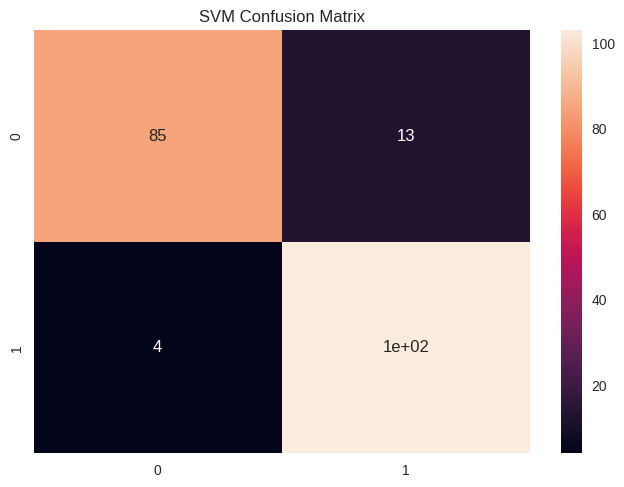

In [ ]:
sns.heatmap(pd.DataFrame(cm),annot=True)

plt.title("SVM Confusion Matrix")
plt.show()

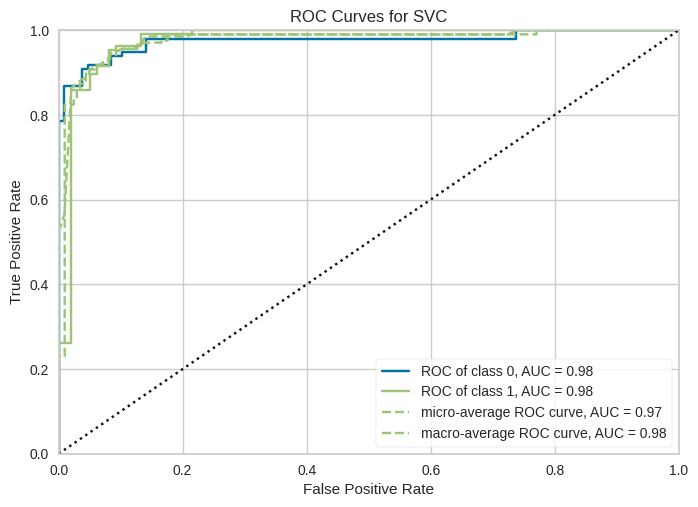

<Axes: title={'center': 'ROC Curves for SVC'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [ ]:
roc=ROCAUC(svm)
roc.fit(x_train,y_train)
roc.score(x_test,y_test)
roc.show()

In [ ]:
#Decision Tree

In [ ]:
clf = DTC(max_depth=3, random_state = 42)
clf.fit(x_train, y_train)
y_pred_clf = clf.predict(x_test)

In [ ]:
cm=confusion_matrix(y_test,y_pred_clf)

In [ ]:
precision,recall,f1_score=metrics(cm)

print(f'confusion matrix\n{cm},\nDecision Tree Classifier:\naccuracy={accuracy_score(y_test,y_pred_clf)*100:.3f} \nprecision={precision*100:.3f} \nrecall={recall*100:.3f} \nf1_score={f1_score*100:.3f}')

confusion matrix
[[85 13]
 [14 93]],
Decision Tree Classifier:
accuracy=86.829 
precision=86.735 
recall=85.859 
f1_score=86.294


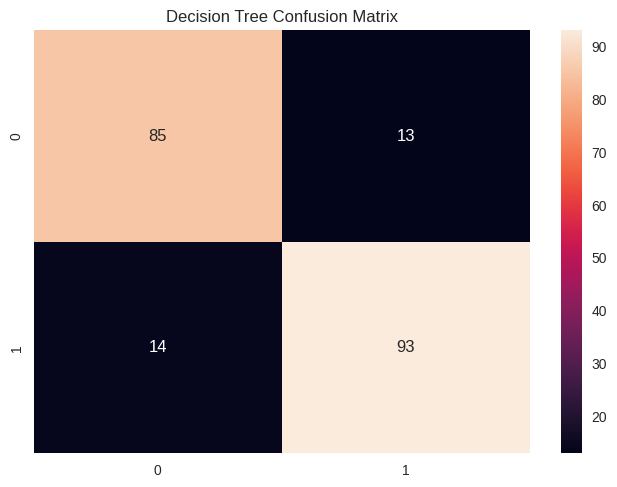

In [ ]:
sns.heatmap(pd.DataFrame(cm),annot=True)

plt.title("Decision Tree Confusion Matrix")
plt.show()

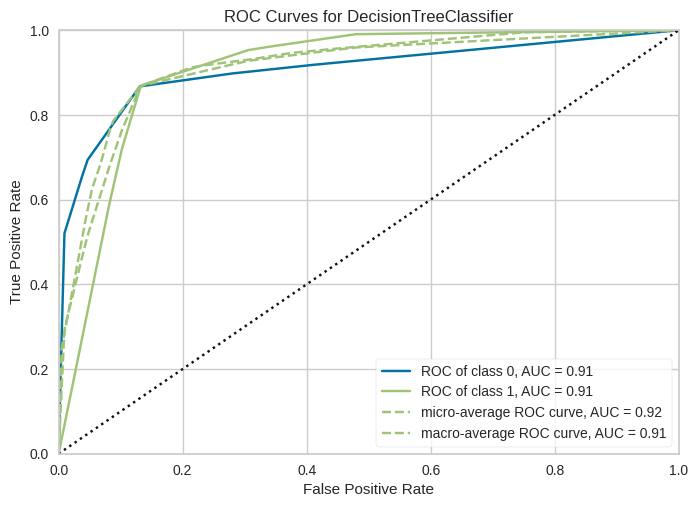

<Axes: title={'center': 'ROC Curves for DecisionTreeClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [ ]:
roc=ROCAUC(clf)
roc.fit(x_train,y_train)
roc.score(x_test,y_test)
roc.show()

In [ ]:
#Random Forest

In [ ]:
rf = RFC(max_depth=2)
rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)

In [ ]:
cm=confusion_matrix(y_test,y_pred_rf)

In [ ]:
 
precision,recall,f1_score=metrics(cm)

print(f'confusion matrix\n{cm},\nRandom Forest Classifier:\naccuracy={accuracy_score(y_test,y_pred_rf)*100:.3f} \nprecision={precision*100:.3f} \nrecall={recall*100:.3f} \nf1_score={f1_score*100:.3f}')

confusion matrix
[[ 72  26]
 [  7 100]],
Random Forest Classifier:
accuracy=83.902 
precision=73.469 
recall=91.139 
f1_score=81.356


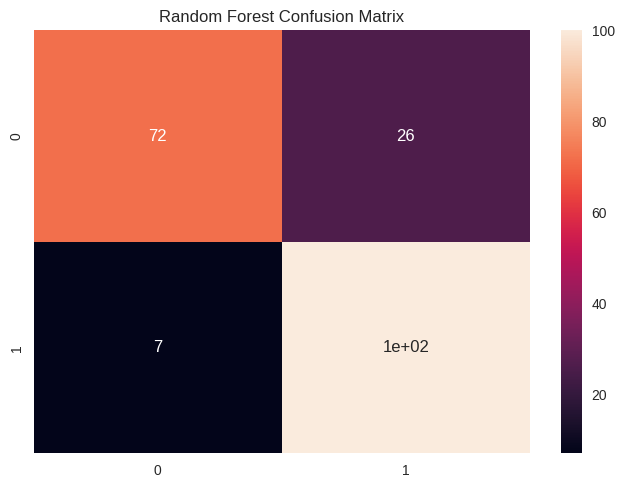

In [ ]:
sns.heatmap(pd.DataFrame(cm),annot=True)

plt.title("Random Forest Confusion Matrix")
plt.show()

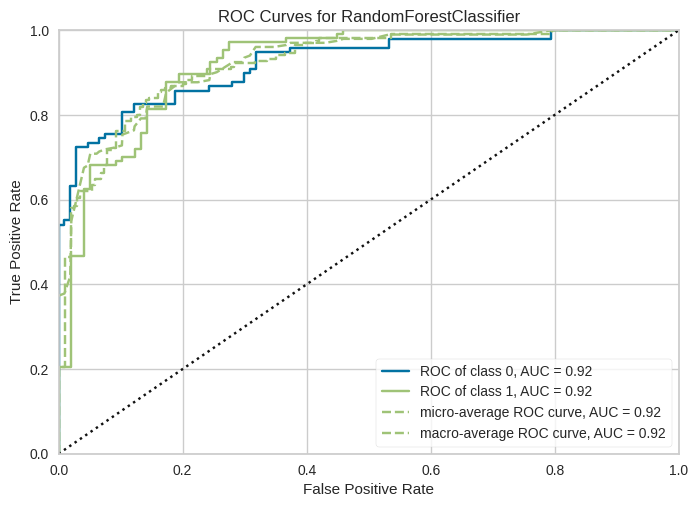

<Axes: title={'center': 'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [ ]:
roc=ROCAUC(rf)
roc.fit(x_train,y_train)
roc.score(x_test,y_test)
roc.show()